<a href="https://colab.research.google.com/github/SakethaAkella/MACHINE-LEARINING-PROJECT/blob/main/APPL_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive

In [50]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DATA SOURCING

Reading the CSV data file

In [52]:
data = pd.read_csv("/content/drive/MyDrive/Cyber crime2019.csv")

Summary of the DataFrame. info() method

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   S. No                                                                          40 non-null     object 
 1   Crime Head                                                                     40 non-null     object 
 2   Cases Pending Investi-gation from Previous Year                                40 non-null     int64  
 3   Cases Reported during the year                                                 40 non-null     int64  
 4   Cases Reopened for Investi-gation                                              40 non-null     int64  
 5   Total Cases for Investi-gation (Col.3+ Col.4+ Col.5)                           40 non-null     int64  
 6   Cases Not Investi-gated Unde

Statistical Details of the DataFrame

In [54]:
data.describe()

,Cases Pending Investi-gation from Previous Year,Cases Reported during the year,Cases Reopened for Investi-gation,Total Cases for Investi-gation (Col.3+ Col.4+ Col.5),Cases Not Investi-gated Under 157_1_b CRPC,Cases Transferred to other State or Agency,Cases With-drawn by the Govt during investi-gation,Final Report - Cases Ended as FR Non Cognizable,Final Report - Cases Ended as Final Report False,Final Report - Cases Ended as Mistake of Fact or of Law or Civil Dispute,Final Report - Cases True but Insufficient Evidence or Untraced or No Clue,Final Report - Cases Abated during Investigation,Final Report - Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14),Chargesheets submitted - Cases Chargesheeted Out of Cases from Previous Year,Chargesheets submitted - Cases Charge- sheeted Out of Cases during the Year,Chargesheets submitted - Cases Chargesheeted (Col.16+ Col.17),Total Cases Disposed Off by Police (Col.7+ Col.8+ Col.15+ Col.18),Cases Quashed at Investigation Stage,Cases Stayed at Investigation Stage,Cases Pending Investigation at End of the Year (Col.6- Col.9- Col.19- Col.20),Charge-Sheeting Rate (Col.18/ Col.19) *100,Pen- dency Percent age (Col.22/ Col.6) *100
count,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,39.000000,40.000000
mean,802.475000,1113.650000,0.600000,1916.725000,0.0,3.250000,0.025000,0.450000,37.650000,29.000000,287.925000,2.100000,357.12500,90.175000,141.550000,231.725000,592.100000,1.67500,0.100000,1322.925000,56.953846,62.267500
std,1561.316719,2177.359711,1.428645,3707.116621,0.0,14.457276,0.158114,1.986493,112.364003,39.966011,472.659871,8.040921,578.71184,134.040156,197.922926,319.571347,851.762149,2.53577,0.303822,3084.705483,26.908009,21.554955
min,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,13.100000,0.000000
25%,21.250000,14.000000,0.000000,37.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.75000,1.750000,4.750000,7.250000,10.750000,0.00000,0.000000,26.750000,32.400000,54.900000
50%,280.500000,326.000000,0.000000,610.500000,0.0,0.000000,0.000000,0.000000,2.500000,8.000000,74.500000,0.000000,96.00000,20.500000,38.500000,63.500000,184.500000,0.00000,0.000000,402.000000,54.200000,65.600000
75%,985.250000,1216.250000,0.000000,2108.000000,0.0,1.000000,0.000000,0.000000,29.000000,48.500000,264.500000,0.250000,401.50000,149.250000,204.500000,415.750000,869.750000,3.00000,0.000000,1121.500000,79.300000,74.875000
max,8634.000000,12255.000000,6.000000,20889.000000,0.0,91.000000,1.000000,12.000000,694.000000,119.000000,1633.000000,49.000000,2246.00000,630.000000,743.000000,1203.000000,2972.000000,9.00000,1.000000,18339.000000,100.000000,100.000000


Printing the first 20 rows of the DataFrame

In [55]:
data.head(20)

,S. No,Crime Head,Cases Pending Investi-gation from Previous Year,Cases Reported during the year,Cases Reopened for Investi-gation,Total Cases for Investi-gation (Col.3+ Col.4+ Col.5),Cases Not Investi-gated Under 157_1_b CRPC,Cases Transferred to other State or Agency,Cases With-drawn by the Govt during investi-gation,Final Report - Cases Ended as FR Non Cognizable,Final Report - Cases Ended as Final Report False,Final Report - Cases Ended as Mistake of Fact or of Law or Civil Dispute,Final Report - Cases True but Insufficient Evidence or Untraced or No Clue,Final Report - Cases Abated during Investigation,Final Report - Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14),Chargesheets submitted - Cases Chargesheeted Out of Cases from Previous Year,Chargesheets submitted - Cases Charge- sheeted Out of Cases during the Year,Chargesheets submitted - Cases Chargesheeted (Col.16+ Col.17),Total Cases Disposed Off by Police (Col.7+ Col.8+ Col.15+ Col.18),Cases Quashed at Investigation Stage,Cases Stayed at Investigation Stage,Cases Pending Investigation at End of the Year (Col.6- Col.9- Col.19- Col.20),Charge-Sheeting Rate (Col.18/ Col.19) *100,Pen- dency Percent age (Col.22/ Col.6) *100
0,1,Tampering computer source documents,165,173,0,338,0,0,0,0,3,6,90,0,99,12,30,42,141,1,1,196,29.8,58.0
1,2.1.1,Ransom-ware Computer Related Offences,995,1023,0,2018,0,0,0,12,25,5,871,0,913,264,141,405,1318,1,0,699,30.7,34.6
2,2.1.2,Offences other than Ransom-ware Computer Relat...,2732,3444,0,6176,0,2,0,4,38,119,1606,0,1767,630,573,1203,2972,3,1,3201,40.5,51.8
3,2.2,Dishonestly receiving stolen computer resource...,396,558,0,954,0,1,0,0,16,40,208,0,264,65,106,171,436,3,0,515,39.2,54.0
4,2.3,Identity Theft,8634,12255,0,20889,0,91,0,0,138,117,1633,3,1891,246,317,563,2545,5,0,18339,22.1,87.8
5,2.4,Cheating by personation by using computer reso...,2572,5520,3,8095,0,15,0,0,53,105,1229,49,1436,398,743,1141,2592,8,1,5495,44.0,67.9
6,2.5,Violation of Privacy,379,812,1,1192,0,1,0,0,10,11,153,0,174,150,69,219,394,2,1,796,55.6,66.8
7,3,Cyber Terrorism,23,12,0,35,0,0,0,0,2,1,3,0,6,0,3,3,9,0,0,26,33.3,74.3
8,4.1,Publishing or transmitting obscene material in...,1065,1845,0,2910,0,5,0,0,42,68,388,0,498,238,504,742,1245,3,0,1662,59.6,57.1
9,4.2,Publishing or transmitting of material contain...,982,1394,2,2378,0,1,0,0,29,35,213,4,281,157,403,560,842,4,0,1532,66.5,64.4


DATA CLEANING

Obtaining Nan values

In [56]:
data.isnull().sum()

S. No                                                                            0
Crime Head                                                                       0
Cases Pending Investi-gation from Previous Year                                  0
Cases Reported during the year                                                   0
Cases Reopened for Investi-gation                                                0
Total Cases for Investi-gation (Col.3+ Col.4+ Col.5)                             0
Cases Not Investi-gated Under 157_1_b CRPC                                       0
Cases Transferred to other State or Agency                                       0
Cases With-drawn by the Govt during investi-gation                               0
Final Report -  Cases Ended as FR Non Cognizable                                 0
Final Report -  Cases Ended as Final Report False                                0
Final Report -  Cases Ended as Mistake of Fact or of Law or Civil Dispute        0
Fina

Replacing the Nan values with 0's

In [57]:
data = data.fillna(method="bfill", axis=0).fillna(0)
data

,S. No,Crime Head,Cases Pending Investi-gation from Previous Year,Cases Reported during the year,Cases Reopened for Investi-gation,Total Cases for Investi-gation (Col.3+ Col.4+ Col.5),Cases Not Investi-gated Under 157_1_b CRPC,Cases Transferred to other State or Agency,Cases With-drawn by the Govt during investi-gation,Final Report - Cases Ended as FR Non Cognizable,Final Report - Cases Ended as Final Report False,Final Report - Cases Ended as Mistake of Fact or of Law or Civil Dispute,Final Report - Cases True but Insufficient Evidence or Untraced or No Clue,Final Report - Cases Abated during Investigation,Final Report - Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14),Chargesheets submitted - Cases Chargesheeted Out of Cases from Previous Year,Chargesheets submitted - Cases Charge- sheeted Out of Cases during the Year,Chargesheets submitted - Cases Chargesheeted (Col.16+ Col.17),Total Cases Disposed Off by Police (Col.7+ Col.8+ Col.15+ Col.18),Cases Quashed at Investigation Stage,Cases Stayed at Investigation Stage,Cases Pending Investigation at End of the Year (Col.6- Col.9- Col.19- Col.20),Charge-Sheeting Rate (Col.18/ Col.19) *100,Pen- dency Percent age (Col.22/ Col.6) *100
0,1,Tampering computer source documents,165,173,0,338,0,0,0,0,3,6,90,0,99,12,30,42,141,1,1,196,29.8,58.0
1,2.1.1,Ransom-ware Computer Related Offences,995,1023,0,2018,0,0,0,12,25,5,871,0,913,264,141,405,1318,1,0,699,30.7,34.6
2,2.1.2,Offences other than Ransom-ware Computer Relat...,2732,3444,0,6176,0,2,0,4,38,119,1606,0,1767,630,573,1203,2972,3,1,3201,40.5,51.8
3,2.2,Dishonestly receiving stolen computer resource...,396,558,0,954,0,1,0,0,16,40,208,0,264,65,106,171,436,3,0,515,39.2,54.0
4,2.3,Identity Theft,8634,12255,0,20889,0,91,0,0,138,117,1633,3,1891,246,317,563,2545,5,0,18339,22.1,87.8
5,2.4,Cheating by personation by using computer reso...,2572,5520,3,8095,0,15,0,0,53,105,1229,49,1436,398,743,1141,2592,8,1,5495,44.0,67.9
6,2.5,Violation of Privacy,379,812,1,1192,0,1,0,0,10,11,153,0,174,150,69,219,394,2,1,796,55.6,66.8
7,3,Cyber Terrorism,23,12,0,35,0,0,0,0,2,1,3,0,6,0,3,3,9,0,0,26,33.3,74.3
8,4.1,Publishing or transmitting obscene material in...,1065,1845,0,2910,0,5,0,0,42,68,388,0,498,238,504,742,1245,3,0,1662,59.6,57.1
9,4.2,Publishing or transmitting of material contain...,982,1394,2,2378,0,1,0,0,29,35,213,4,281,157,403,560,842,4,0,1532,66.5,64.4


Getting the columns of the DataFrame using .columns

In [58]:
data.columns

Index(['S. No', 'Crime Head',
       'Cases Pending Investi-gation from Previous Year',
       'Cases Reported during the year', 'Cases Reopened for Investi-gation',
       'Total Cases for Investi-gation (Col.3+ Col.4+ Col.5)',
       'Cases Not Investi-gated Under 157_1_b CRPC',
       'Cases Transferred to other State or Agency',
       'Cases With-drawn by the Govt during investi-gation',
       'Final Report -  Cases Ended as FR Non Cognizable',
       'Final Report -  Cases Ended as Final Report False',
       'Final Report -  Cases Ended as Mistake of Fact or of Law or Civil Dispute',
       'Final Report -  Cases True but Insufficient Evidence or Untraced or No Clue',
       'Final Report -  Cases Abated during Investigation',
       'Final Report -  Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14)',
       'Chargesheets submitted -  Cases Chargesheeted Out of Cases from Previous Year',
       'Chargesheets submitted -  Cases Charge- sheeted Out of Cases during the Year',
       

Converting the float values of columns to integers

In [59]:
data['Charge-Sheeting Rate (Col.18/ Col.19) *100'] = data['Charge-Sheeting Rate (Col.18/ Col.19) *100'].astype(int)
data['Pen- dency Percent age (Col.22/ Col.6) *100'] = data['Pen- dency Percent age (Col.22/ Col.6) *100'].astype(int)
data

,S. No,Crime Head,Cases Pending Investi-gation from Previous Year,Cases Reported during the year,Cases Reopened for Investi-gation,Total Cases for Investi-gation (Col.3+ Col.4+ Col.5),Cases Not Investi-gated Under 157_1_b CRPC,Cases Transferred to other State or Agency,Cases With-drawn by the Govt during investi-gation,Final Report - Cases Ended as FR Non Cognizable,Final Report - Cases Ended as Final Report False,Final Report - Cases Ended as Mistake of Fact or of Law or Civil Dispute,Final Report - Cases True but Insufficient Evidence or Untraced or No Clue,Final Report - Cases Abated during Investigation,Final Report - Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14),Chargesheets submitted - Cases Chargesheeted Out of Cases from Previous Year,Chargesheets submitted - Cases Charge- sheeted Out of Cases during the Year,Chargesheets submitted - Cases Chargesheeted (Col.16+ Col.17),Total Cases Disposed Off by Police (Col.7+ Col.8+ Col.15+ Col.18),Cases Quashed at Investigation Stage,Cases Stayed at Investigation Stage,Cases Pending Investigation at End of the Year (Col.6- Col.9- Col.19- Col.20),Charge-Sheeting Rate (Col.18/ Col.19) *100,Pen- dency Percent age (Col.22/ Col.6) *100
0,1,Tampering computer source documents,165,173,0,338,0,0,0,0,3,6,90,0,99,12,30,42,141,1,1,196,29,58
1,2.1.1,Ransom-ware Computer Related Offences,995,1023,0,2018,0,0,0,12,25,5,871,0,913,264,141,405,1318,1,0,699,30,34
2,2.1.2,Offences other than Ransom-ware Computer Relat...,2732,3444,0,6176,0,2,0,4,38,119,1606,0,1767,630,573,1203,2972,3,1,3201,40,51
3,2.2,Dishonestly receiving stolen computer resource...,396,558,0,954,0,1,0,0,16,40,208,0,264,65,106,171,436,3,0,515,39,54
4,2.3,Identity Theft,8634,12255,0,20889,0,91,0,0,138,117,1633,3,1891,246,317,563,2545,5,0,18339,22,87
5,2.4,Cheating by personation by using computer reso...,2572,5520,3,8095,0,15,0,0,53,105,1229,49,1436,398,743,1141,2592,8,1,5495,44,67
6,2.5,Violation of Privacy,379,812,1,1192,0,1,0,0,10,11,153,0,174,150,69,219,394,2,1,796,55,66
7,3,Cyber Terrorism,23,12,0,35,0,0,0,0,2,1,3,0,6,0,3,3,9,0,0,26,33,74
8,4.1,Publishing or transmitting obscene material in...,1065,1845,0,2910,0,5,0,0,42,68,388,0,498,238,504,742,1245,3,0,1662,59,57
9,4.2,Publishing or transmitting of material contain...,982,1394,2,2378,0,1,0,0,29,35,213,4,281,157,403,560,842,4,0,1532,66,64


DATA VISUALIZATION

Plotting bar graph for Total Cases vs Crime Head

Text(0, 0.5, 'Crime_Head')

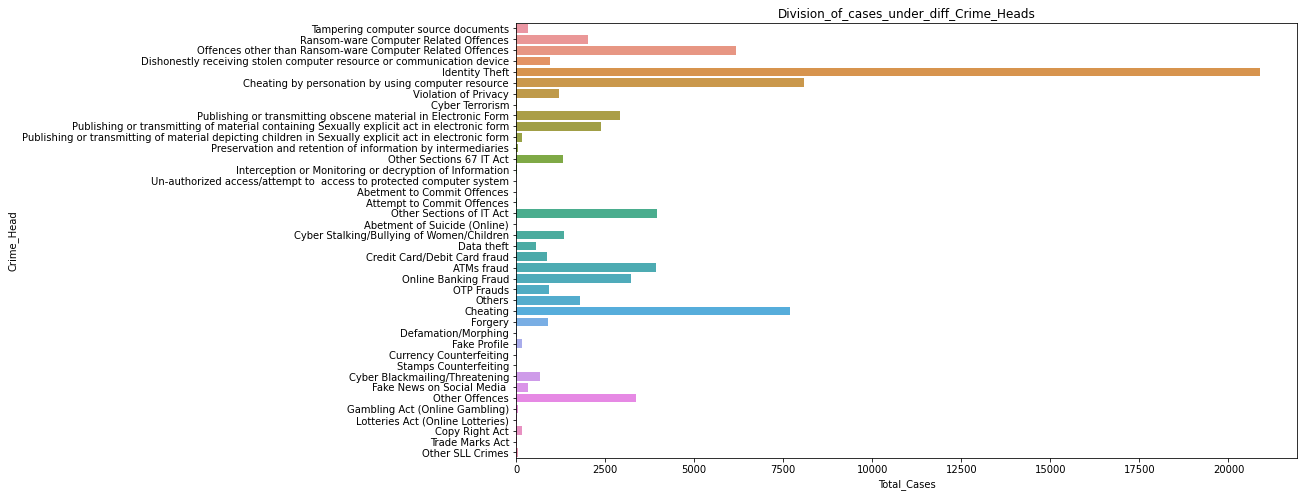

In [60]:
fig,ax=plt.subplots(figsize=(14,8))
plt.title('Division_of_cases_under_diff_Crime_Heads')
sns.barplot(x = data['Total Cases for Investi-gation (Col.3+ Col.4+ Col.5)'],y=data['Crime Head'])
plt.xlabel('Total_Cases')
plt.ylabel('Crime_Head')

Line plots for the Cases vs Crime Heads

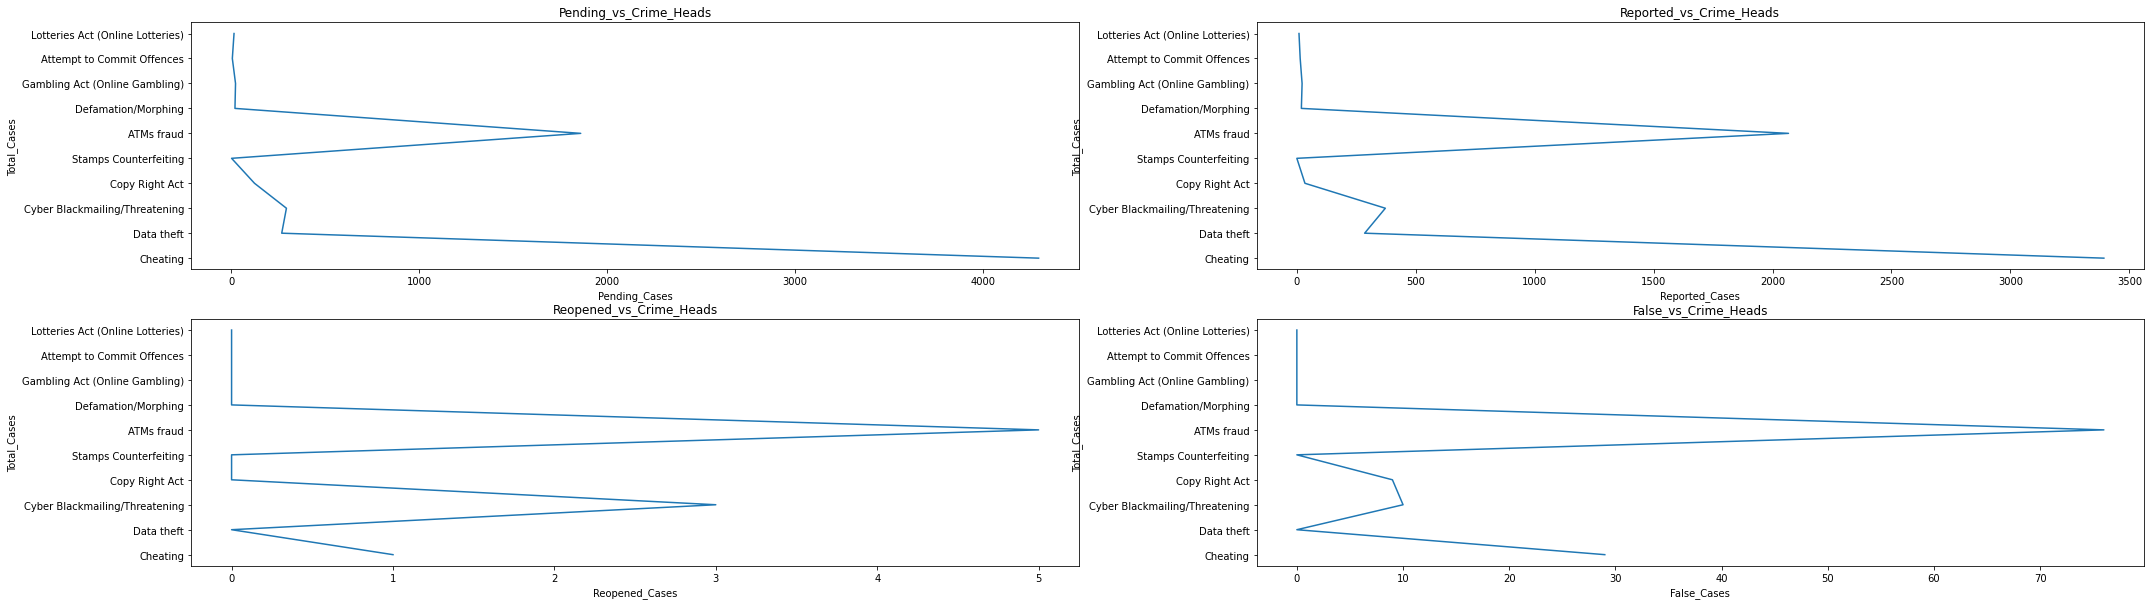

In [61]:
data1 =data.sample(10)
fig, axes=plt.subplots(nrows=4, ncols=4,figsize = (35, 10))
x = data1['Cases Pending Investi-gation from Previous Year']
y = data1['Crime Head']
plt.subplot(2,2,1)
plt.xlabel("Pending_Cases")
plt.ylabel("Total_Cases")
plt.title("Pending_vs_Crime_Heads")
plt.plot(x,y)
plt.subplot(2,2,2)
x = data1['Cases Reported during the year']
y = data1['Crime Head']
plt.xlabel("Reported_Cases")
plt.ylabel("Total_Cases")
plt.title("Reported_vs_Crime_Heads")
plt.plot(x,y)
plt.subplot(2,2,3)
x = data1['Cases Reopened for Investi-gation']
y = data1['Crime Head']
plt.xlabel("Reopened_Cases")
plt.ylabel("Total_Cases")
plt.title("Reopened_vs_Crime_Heads")
plt.plot(x,y)
plt.subplot(2,2,4)
x = data1['Final Report -  Cases Ended as Final Report False']
y = data1['Crime Head']
plt.xlabel("False_Cases")
plt.ylabel("Total_Cases")
plt.title("False_vs_Crime_Heads")
plt.plot(x,y)
plt.show()

Correlation using HeatMap

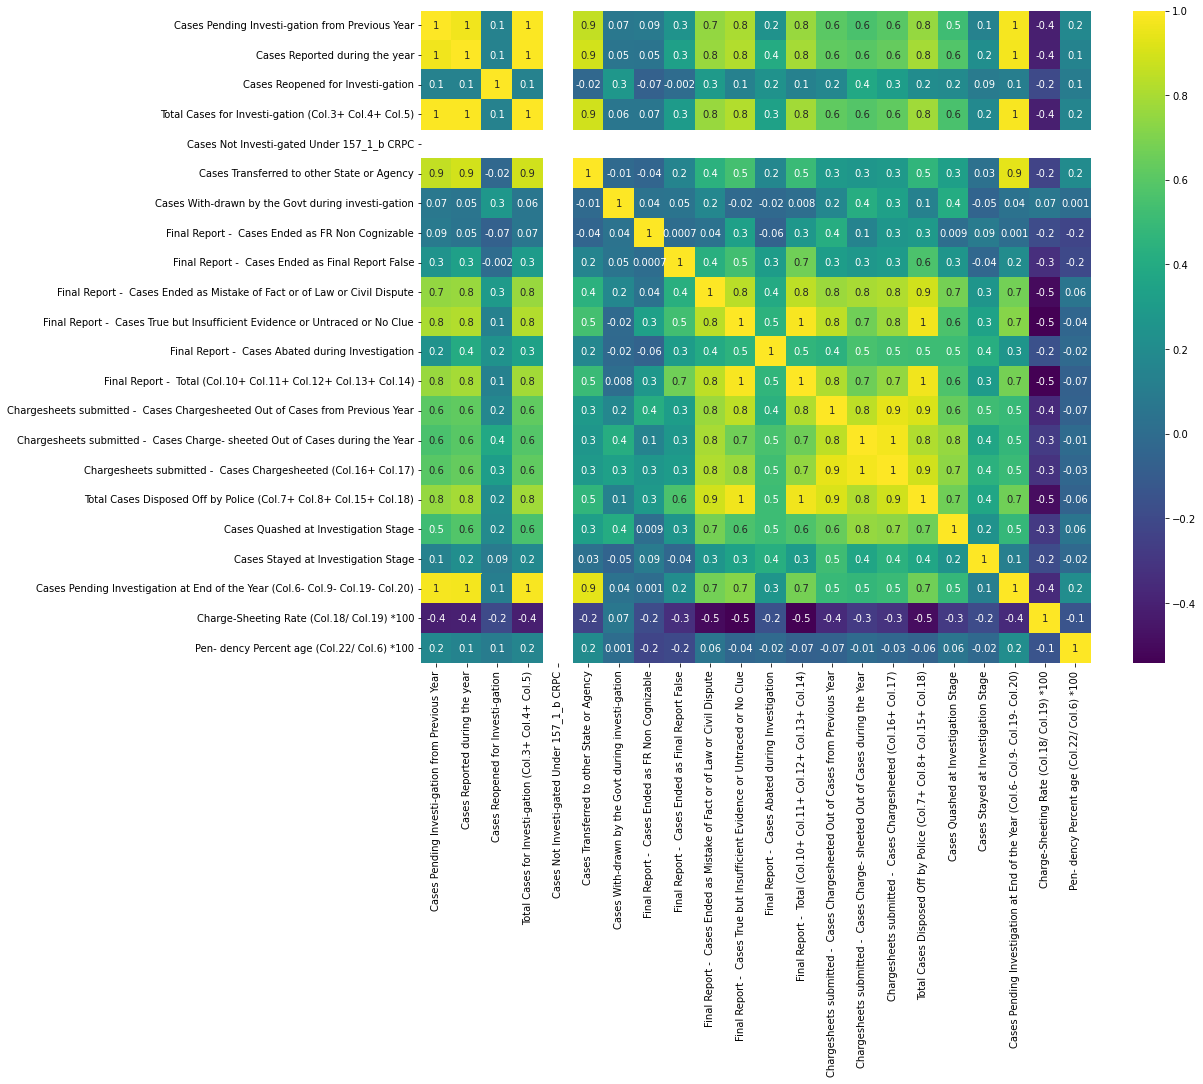

In [62]:
fig, ax=plt.subplots(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap='viridis')

MACHINE LEARNING

Dropping the string valued columns

In [63]:
data = data.drop('S. No',axis=1)
data = data.drop('Crime Head', axis = 1)
data

,Cases Pending Investi-gation from Previous Year,Cases Reported during the year,Cases Reopened for Investi-gation,Total Cases for Investi-gation (Col.3+ Col.4+ Col.5),Cases Not Investi-gated Under 157_1_b CRPC,Cases Transferred to other State or Agency,Cases With-drawn by the Govt during investi-gation,Final Report - Cases Ended as FR Non Cognizable,Final Report - Cases Ended as Final Report False,Final Report - Cases Ended as Mistake of Fact or of Law or Civil Dispute,Final Report - Cases True but Insufficient Evidence or Untraced or No Clue,Final Report - Cases Abated during Investigation,Final Report - Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14),Chargesheets submitted - Cases Chargesheeted Out of Cases from Previous Year,Chargesheets submitted - Cases Charge- sheeted Out of Cases during the Year,Chargesheets submitted - Cases Chargesheeted (Col.16+ Col.17),Total Cases Disposed Off by Police (Col.7+ Col.8+ Col.15+ Col.18),Cases Quashed at Investigation Stage,Cases Stayed at Investigation Stage,Cases Pending Investigation at End of the Year (Col.6- Col.9- Col.19- Col.20),Charge-Sheeting Rate (Col.18/ Col.19) *100,Pen- dency Percent age (Col.22/ Col.6) *100
0,165,173,0,338,0,0,0,0,3,6,90,0,99,12,30,42,141,1,1,196,29,58
1,995,1023,0,2018,0,0,0,12,25,5,871,0,913,264,141,405,1318,1,0,699,30,34
2,2732,3444,0,6176,0,2,0,4,38,119,1606,0,1767,630,573,1203,2972,3,1,3201,40,51
3,396,558,0,954,0,1,0,0,16,40,208,0,264,65,106,171,436,3,0,515,39,54
4,8634,12255,0,20889,0,91,0,0,138,117,1633,3,1891,246,317,563,2545,5,0,18339,22,87
5,2572,5520,3,8095,0,15,0,0,53,105,1229,49,1436,398,743,1141,2592,8,1,5495,44,67
6,379,812,1,1192,0,1,0,0,10,11,153,0,174,150,69,219,394,2,1,796,55,66
7,23,12,0,35,0,0,0,0,2,1,3,0,6,0,3,3,9,0,0,26,33,74
8,1065,1845,0,2910,0,5,0,0,42,68,388,0,498,238,504,742,1245,3,0,1662,59,57
9,982,1394,2,2378,0,1,0,0,29,35,213,4,281,157,403,560,842,4,0,1532,66,64


In [64]:
X = data.drop('Cases Stayed at Investigation Stage',axis=1)
X.head()

,Cases Pending Investi-gation from Previous Year,Cases Reported during the year,Cases Reopened for Investi-gation,Total Cases for Investi-gation (Col.3+ Col.4+ Col.5),Cases Not Investi-gated Under 157_1_b CRPC,Cases Transferred to other State or Agency,Cases With-drawn by the Govt during investi-gation,Final Report - Cases Ended as FR Non Cognizable,Final Report - Cases Ended as Final Report False,Final Report - Cases Ended as Mistake of Fact or of Law or Civil Dispute,Final Report - Cases True but Insufficient Evidence or Untraced or No Clue,Final Report - Cases Abated during Investigation,Final Report - Total (Col.10+ Col.11+ Col.12+ Col.13+ Col.14),Chargesheets submitted - Cases Chargesheeted Out of Cases from Previous Year,Chargesheets submitted - Cases Charge- sheeted Out of Cases during the Year,Chargesheets submitted - Cases Chargesheeted (Col.16+ Col.17),Total Cases Disposed Off by Police (Col.7+ Col.8+ Col.15+ Col.18),Cases Quashed at Investigation Stage,Cases Pending Investigation at End of the Year (Col.6- Col.9- Col.19- Col.20),Charge-Sheeting Rate (Col.18/ Col.19) *100,Pen- dency Percent age (Col.22/ Col.6) *100
0,165,173,0,338,0,0,0,0,3,6,90,0,99,12,30,42,141,1,196,29,58
1,995,1023,0,2018,0,0,0,12,25,5,871,0,913,264,141,405,1318,1,699,30,34
2,2732,3444,0,6176,0,2,0,4,38,119,1606,0,1767,630,573,1203,2972,3,3201,40,51
3,396,558,0,954,0,1,0,0,16,40,208,0,264,65,106,171,436,3,515,39,54
4,8634,12255,0,20889,0,91,0,0,138,117,1633,3,1891,246,317,563,2545,5,18339,22,87


In [65]:
y = data['Cases Stayed at Investigation Stage']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Cases Stayed at Investigation Stage, dtype: int64

Splitting data for Training and Testing

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [67]:
len(X_train),len(X_test)

(28, 12)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION MODEL

In [69]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
LogisticRegressionScore = mod.score(X_test, y_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_mod = mod.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_mod)
cf_matrix

array([[9, 2],
       [1, 0]])

Text(0.5, 1.06, 'Confusion Matrix for Logistic Regression')

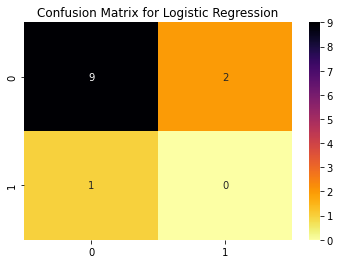

In [72]:
sns.heatmap(cf_matrix, annot=True, cmap='inferno_r')
plt.title('Confusion Matrix for Logistic Regression',fontsize=12, y=1.06)

In [73]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_mod))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.45      0.41      0.43        12
weighted avg       0.83      0.75      0.79        12



In [74]:
LogisticRegressionScore*100

75.0

RANDOM FOREST MODEL

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
RandomForestClassifierScore = rfc.score(X_test,y_test)

In [77]:
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
cf_matrix

array([[10,  1],
       [ 1,  0]])

Text(0.5, 1.06, 'Confusion Matrix for Random Forest Classifier')

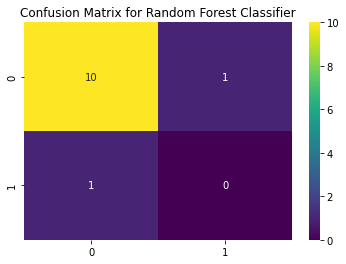

In [78]:
sns.heatmap(cf_matrix, annot=True, cmap='viridis')
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=12,y=1.06)

In [79]:
print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.45      0.45      0.45        12
weighted avg       0.83      0.83      0.83        12



In [80]:
RandomForestClassifierScore*100

83.33333333333334

DECISION TREE CLASSIFIER

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)

In [83]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred_dtc)
cf_matrix

array([[11,  0],
       [ 1,  0]])

Text(0.5, 1.06, 'Confusion Matrix for Decision Tree Classifier')

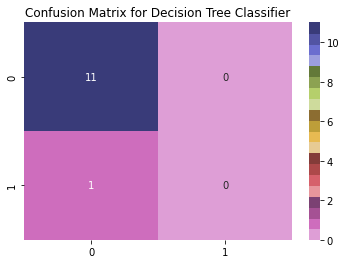

In [84]:
sns.heatmap(cf_matrix, annot=True, cmap='tab20b_r')
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize=12, y=1.06)

In [85]:
print(metrics.classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



In [86]:
DecisionTreeClassifierScore*100

91.66666666666666

In [87]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train,cv=2,scoring='accuracy')
print("scores :",scores)
print("mean :",scores.mean())
print("standard deviation :",scores.std())

scores : [0.92857143 0.85714286]
mean : 0.8928571428571428
standard deviation : 0.035714285714285754


In [88]:
print("Accuracy obtained by LogisticRegressionModel : ",LogisticRegressionScore*100)
print("Accuracy obtained by RandomForestClassifierModel :",RandomForestClassifierScore*100)
print("Accuracy obtained by DecisionTreeClassifierModel :",DecisionTreeClassifierScore*100)

Accuracy obtained by LogisticRegressionModel :  75.0
Accuracy obtained by RandomForestClassifierModel : 83.33333333333334
Accuracy obtained by DecisionTreeClassifierModel : 91.66666666666666


Therefore the best Machine Learining Model obtained for our DataFrame is Decision Tree Classifier with more accuracy.